# Programming Exercise 2: Logistic Regression
## Introduction
 在这一次练习中，我们将要实现逻辑回归并且应用到一个分类任务。我们还将通过将正则化加入训练算法，来提高算法的鲁棒性，并用更复杂的情形来测试它。
## 1 Logistic Regression
 In this part of the exercise, you will build a logistic regression model to predict whether a student gets admitted into a university.
 
 Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions decision.
 
 Your task is to build a classification model that estimates an applicant’s probability of admission based the scores from those two exams. 

所用到的Python库

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.optimize import minimize

In [2]:
# Load data from exldata1.tex file
# - column 1: first scores
# - column 2: second scores
# - column 3: the admission decision (1 pass) 
data = np.loadtxt('datas/ex2data1.txt', delimiter=',')

# Split data into X and y
X,y = np.hsplit(data,np.array([2]))

# Print out some data points
print("First 8 examples from the dataset:")
for i in range(8):
    print("X="+str(X[i,:]),"y="+str(y[i])) # 冒号的用法[i,:] 返回第i行所有元素

First 8 examples from the dataset:
X=[ 34.62365962  78.02469282] y=[ 0.]
X=[ 30.28671077  43.89499752] y=[ 0.]
X=[ 35.84740877  72.90219803] y=[ 0.]
X=[ 60.18259939  86.3085521 ] y=[ 1.]
X=[ 79.03273605  75.34437644] y=[ 1.]
X=[ 45.08327748  56.31637178] y=[ 0.]
X=[ 61.10666454  96.51142588] y=[ 1.]
X=[ 75.02474557  46.55401354] y=[ 1.]


### 1.1 Visualizing the data
Before starting to implement any learning algorithm, it is always good to visualize the data if possible.

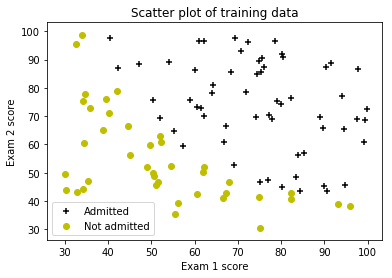

In [3]:
# Plot data
"""
    PLOTDATA Plots the data points X and y into a new figure 
    PLOTDATA(x,y) plots the data points with + for the positive examples
    and o for the negative examples. X is assumed to be a Mx2 matrix.
"""
def plotData(X,y,x1label='Admitted',x2label='Not admitted'):
# Get the indices of positive and negative examples
    pos=np.squeeze(y==1) 
    neg=np.squeeze(y==0)
    plt.scatter(X[pos][:,0],X[pos][:,1],c='k',marker='+',label=x1label)
    plt.scatter(X[neg][:,0],X[neg][:,1],c='y',marker='o',label=x2label)
    plt.title("Scatter plot of training data")
    plt.xlabel("Exam 1 score")
    plt.ylabel("Exam 2 score")
    plt.legend()
plotData(X,y)
plt.show()

### 1.2 Implementation
#### 1.2.1 Warmup exercise: sigmoid function
Before you start with the actual cost function, recall that the logistic regression hypothesis is defined as:
$$h_{\theta}(x) = g(\theta ^T x)$$

where function $g$ is the sigmoid function. The sigmoid function is defined as:
$$g(z) = \frac{1}{1+e^{-z}}$$


 


In [4]:
# Sigmoid Function
def sigmoid(z):
    """
    g = SIGMOID(z) computes the sigmoid of z.
    You need to return the following variables correctly 
    """
    g=1/(1+np.exp(-z))
    return g

#### 1.2.2 Cost function and gradient
Now you will implement the cost function and gradient for logistic regression.
Recall that the cost function in logistic regression is
$$J(\theta) = \frac{1}{m} \sum_{i=1}^m [-y^{(i)} \log(h_{\theta}(x^{(i)})) - (1-y^{(i)})\log(1-h_{\theta}(x^{(i)}))]$$
and the gradient of the cost is a vector of the same length as $\theta$ where the $j^{\text{th}}$ element (for $j = 0, 1, \ldots, n$) is defined as follows:
$$\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [5]:
def costFunction(theta,X,y):
    """
    COSTFUNCTION Compute cost and gradient for logistic regression
    J = COSTFUNCTION(theta, X, y) computes the cost of using theta as the
    parameter for logistic regression and the gradient of the cost
    w.r.t. to the parameters.
    """
    
    # Arguments theta must be rank 1 array
    theta = theta.reshape((theta.shape[0], 1))
    
    # Initialize some useful values
    m=y.shape[0]  # number of training examples
    
    # Compute the cost J
    J=np.sum(-y*np.log(sigmoid(np.dot(X,theta)))-(1-y)*np.log(1-sigmoid(np.dot(X,theta))))/m
    
    # Compute the gradients
    grads=np.dot(X.T,sigmoid(np.dot(X,theta))-y)/m
    
    #Rerturn J and grads (grads should be a rank 1 array)
    return J,grads.ravel()

1. numpy.ravel()将多维数组降位一维
   -  x = np.array([[1, 2], [3, 4]])
     
      x.ravel() 输出 array([1, 2, 3, 4])
2. grad[True].T #turn grad from rank 1 array to column vector

In [6]:
# Compute cost and gradient

# Setup the data matrix appropriately, and add ones for the intercept term
m,n=X.shape

# Add intercept term to x and X_test
X = np.hstack((np.ones((m,1)),X))

# Initialize fitting parameters
initial_theta = np.zeros((n + 1, 1))

# Compute and display initial cost and gradient
cost,grad=costFunction(initial_theta,X,y)

print("Cost at initial theta (zeros):"+str(cost))
print("Expected cost (approx):0.693")
print("Gradient at initial theta (zeros):")
print(grad.T) # turn grad from rank 1 array to column vector
print("Expected gradients (approx): ")
print(np.array([[-0.1000], [-12.0092], [-11.2628]]))

# Compute and display cost and gradient with non-zero theta
test_theta=np.array([[-24],[0.2],[0.2]])
cost,grad=costFunction(test_theta,X,y)

print("Cost at test theta:")
print(cost)
print("Expected cost (approx): 0.218")
print("Gradient at test theta: ")
print(grad)
print("Expected gradients (approx): ")
print(np.array([[0.043], [2.566], [2.647]]))
print("Program paused. Press enter to continue.")

Cost at initial theta (zeros):0.69314718056
Expected cost (approx):0.693
Gradient at initial theta (zeros):
[ -0.1        -12.00921659 -11.26284221]
Expected gradients (approx): 
[[ -0.1   ]
 [-12.0092]
 [-11.2628]]
Cost at test theta:
0.218330193827
Expected cost (approx): 0.218
Gradient at test theta: 
[ 0.04290299  2.56623412  2.64679737]
Expected gradients (approx): 
[[ 0.043]
 [ 2.566]
 [ 2.647]]
Program paused. Press enter to continue.


#### 1.2.3 Learning parameters using fminunc
In the previous assignment, you found the optimal parameters of a linear re- gression model by implementing gradent descent. You wrote a cost function and calculated its gradient, then took a gradient descent step accordingly.

In [7]:
# Optimizing using minimize
# Note: `fminunc` in MATLAB/Octave uses Quasi-Newton method by default,
# so I use *BFGS* (Quasi-Newton's implementation) here.
# https://en.wikipedia.org/wiki/Quasi-Newton_method
optimizeresult=minimize(fun=costFunction,x0=initial_theta.ravel(),args=(X,y),method='BFGS',jac=True,options={'maxiter':400})

# print(optimizeResult)
theta=optimizeresult.x
theta=theta.reshape((theta.shape[0],1))
cost=optimizeresult.fun

#Print theta to screen
print("Cost at theta found by fminunc:")
print(cost)
print("Expected cost (approx): 0.203")
print("theta: ")
print(theta)
print("Expected theta (approx): ")
print(np.array([[-25.161], [0.206], [0.201]]))

Cost at theta found by fminunc:
0.20349770158944375
Expected cost (approx): 0.203
theta: 
[[-25.16133284]
 [  0.2062317 ]
 [  0.2014716 ]]
Expected theta (approx): 
[[-25.161]
 [  0.206]
 [  0.201]]


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()


1. scipy.optimize.minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None,
   constraints=(), tol=None, callback=None, options=None)[source]
   - fun:The objective function to be minimized. 
   -  x0:Initial guess. 
   - args:Extra arguments passed to the objective function and its derivatives (Jacobian, Hessian).
   - method:'Nelder-Mead' 'Powell' 'BFGS' 'L-BFGS-B' .....
   - options:A dictionary of solver options. maxiter:Maximum number of iterations to perform.
   - jac:Jacobian (gradient) of objective function.
2. 高级优化：如果我们能用这些方法来计算代价函数$J(\theta)$和偏导数项$ \frac{\partial}{\partial\theta_j}J(\theta)$两个项的话，那么这些算法就是为我们优化代价函数的不同方法，共轭梯度法 BFGS (变尺度法) 和 L-BFGS (限制变尺 度法) 就是其中一些更高级的优化算法，它们需要有一种方法来计算$J(\theta)$，以及需要一种方 法计算导数项，然后使用比梯度下降更复杂的算法来最小化代价函数。梯度下降并不是我们可以使用的唯一算法，还有其他一些算法，更高级、更复杂。

In [8]:
# plot Boundary
def plotDecisionBoundary(theta, X, y,lambd=1):
    """
    PLOTDECISIONBOUNDARY Plots the data points X and y into a new figure with
    the decision boundary defined by theta
    PLOTDECISIONBOUNDARY(theta, X,y) plots the data points with + for the 
    positive examples and o for the negative examples. X is assumed to be 
    a either 
    1) Mx3 matrix, where the first column is an all-ones column for the 
       intercept.
    2) MxN, N>3 matrix, where the first column is all-ones
    """
    # Get the original data of X without the intercept term
    X_orig = np.hsplit(X, np.array([1]))[1]
    
    if X_orig.shape[1] <=3:
        # Plot the training data
        plotData(X_orig, y)
        # plot a straight line
        # only need 2 points to define a line,so choose two endpoints
        x1_min = X_orig.min(axis=0)[0]
        x1_max = X_orig.max(axis=0)[0]
        x1_plot = np.arange(x1_min, x1_max)
        x2_plot = (0 - theta[0] - theta[1] * x1_plot) / theta[2]
        plt.plot(x1_plot, x2_plot)
        plt.axis([30, 100, 30, 100])
    else:
        # Plot the training data
        figContour = plt.figure()
        plotData(X_orig, y, "y=1", "y=0")
        # Plot a contour
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)
        
        z = np.zeros((u.shape[0], v.shape[0]))
        # Evaluate z = theta * x over the grid
        for i in range(u.shape[0]):
            for j in range(v.shape[0]):
                uArray = np.array([[u[i]]])
                vArray = np.array([[v[j]]])
                z[i][j] = np.dot(mapFeature(uArray, vArray), theta)

        
        # Make the meshgrid
        u, v = np.meshgrid(u, v)
                
        z = z.T # important to transpoze z before calling contour
        
        # Contour plot
        plt.contour(u, v, z, np.array([0]))
        plt.xlabel("Microchip Test 1")
        plt.ylabel("Microchip Test 2")
        plt.title(r"Training data with decision boundary ($\lambda$ = "+ str(lambd) + ")")

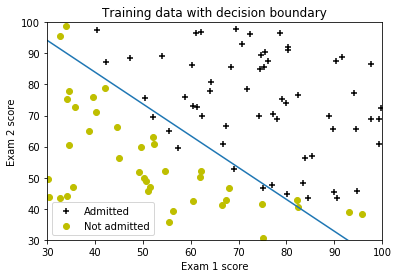

In [9]:
# Plot the decision boundary
plotDecisionBoundary(theta, X, y)
plt.title("Training data with decision boundary")
plt.show()

#### 1.2.4 Evaluating logistic regression
After learning the parameters, you can use the model to predict whether a particular student will be admitted. For a student with an Exam 1 score of 45 and an Exam 2 score of 85, you should expect to see an admission probability of 0.776.

Another way to evaluate the quality of the parameters we have found is to see how well the learned model predicts on our training set. The predict function will produce “1” or “0” predictions given a dataset and a learned parameter vector θ.

In [10]:
# Predict probability for a student with score 45 on exam 1 and score 85 on exam 2 
prob = np.squeeze(sigmoid(np.dot(np.array([[1,45,85]]), theta))) # 进行维度压缩，使prob变成一个数，而不是1*1的
print("For a student with scores 45 and 85, we predict an admission ...probability of " +str(prob))
print("Expected value: 0.775 +/- 0.002")

For a student with scores 45 and 85, we predict an admission ...probability of 0.7762907240588949
Expected value: 0.775 +/- 0.002


In [11]:
def predict(theta,X):
    """
    PREDICT Predict whether the label is 0 or 1 using learned logistic 
    regression parameters theta
    p = PREDICT(theta, X) computes the predictions for X using a 
    threshold at 0.5 (i.e., if sigmoid(theta'*x) >= 0.5, predict 1)
    """
    m=y.shape[0] # Number of training examples
    
    # You need to return the following variables correctly
    p=np.zeros((m,1))
    
    h=sigmoid(np.dot(X,theta))
    p[h>=0.5]=1
    return p

1. 不能用 if h >= 0.5: p=1
   出错：The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()
   原因：只能计算单个值了，如果传入的是一个array，自然就会报错

In [12]:
# Compute accuracy on our training set
p=predict(theta,X)
result= np.sum(p==y)/m*100
print("Train Accuracy: "+ str(result))
print("Expected accuracy (approx): 89.0")


Train Accuracy: 89.0
Expected accuracy (approx): 89.0


## 2. Regularized logistic regression
In this part of the exercise, you will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly.

Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.

### 2.1. Visualizing thet data
Similar to the previous parts of this exercise, `plotData` is used to generate a figure of the data, where the axes are the two test scores and the positive ($y = 1$, accepted) and negative ($y = 0$, rejected) examples
are shown with different markers.

But the data of `data/ex2/ex2data1.txt` cannot be separated into positive and negative examples by a straight-line through the plot. Therefore, a straight-forward application of logistic regression will only be able to find a linear decision boundary.

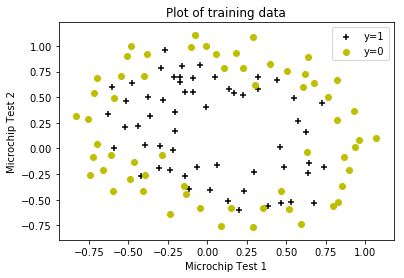

In [13]:
# Load Data
# - column 1: score of microchip test 1
# - column 2: score of microchip test 2
# - column 3: accepted (1) or not (0)
data = np.loadtxt('datas/ex2data2.txt',delimiter=',')
X, y=np.hsplit(data,np.array([2]))

#Specified in plot order
plotData(X, y, "y=1", "y=0")

# Labels and Legend
plt.xlabel("Microchip Test 1")
plt.ylabel("Microchip Test 2")
plt.title("Plot of training data")

plt.show()

### 2.2. Feature mapping
One way to fit the data better is to create more features from each data point. In the function `mapFeature`, we will map the features into all polynomial terms of $x_1$ and $x_2$ up to the sixth power.
$$\text{mapFeature}(x) = \left[\begin{array}{c} 1 \\ x_1 \\ x_2 \\ x_2 \\ x_1^2 \\ x_1 x_2 \\ x_2^2 \\ x_1^3 \\ \vdots \\ x_1 \\ x_2^5 \\ x_2^6 \end{array} \right]$$

As a result of this mapping, our vector of two features (the scores on two QA tests) has been transformed into a 28-dimensional vector. A logistic regression classifier trained on this higher-dimension feature vector will have a more complex decision boundary and will appear nonlinear when drawn in our 2-dimensional plot.

While the feature mapping allows us to build a more expressive classifier, it is also more susceptible to overfitting. In the next parts of the exercise, you will implement regularized logistic regression to fit the data and also see for yourself how regularization can help cambat the overfitting problem.

In [14]:
def mapFeature(X1,X2):
    """
    MAPFEATURE Feature mapping function to polynomial features
    MAPFEATURE(X1, X2) maps the two input features
    to quadratic features used in the regularization exercise.
    
    Returns a new feature array with more features, comprising of 
    X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..

    Inputs X1, X2 must be the same size
    """
    degree = 6
    result=np.ones((X1.shape[0],1))
    for i in range(degree+1):
        for j in range(i+1):
            result=np.hstack((result,np.power(X1,i-j)*np.power(X2,j)))
    
    return result

In [15]:
# Note that mapFeature also adds a column of ones, so the intercept
# term is handled
X= mapFeature(X[:, [0]], X[:, [1]])

### 2.3. Cost function and gradient

Now you will implement code to compute the cost function and gradient for regularized logistic regression. Complete the code in `costFunctionReg` function to return the cost and gradient.

Recall that the regularized cost function in logistic regression is
$$ J(\theta) = \frac{1}{m} [-y^{(i)} \log (h_{\theta}(x^{(i)})) - (1-y^{(i)}) \log (1-h_{\theta}(x^{(i)}))] + \frac{\lambda}{2m} \sum_{j=1}^n \theta_j^2 $$

Note that you should not regularize the parameter $\theta_0$. The gradient of the cost function is a vector where the $j^\text{th}$ element is defined as follows:
$$ \frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)}) x_j^{(i)} \qquad \text{for } j = 0 $$
$$ \frac{\partial J(\theta)}{\partial \theta_j} = \left(\frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)} - y^{(i)}) x_j^{(i)}\right) + \frac{\lambda}{m} \theta_j \qquad \text{for } j \geq 1 $$

Once you are done, the script will call your `costFunctionReg` function using the initial value of $\theta$ (initialized to all zeros). You should see that the cost is about 0.693.

In [16]:
def costFunctionReg(theta,X,y,lambd):
    """
    COSTFUNCTIONREG Compute cost and gradient for logistic regression with regularization
    J = COSTFUNCTIONREG(theta, X, y, lambda) computes the cost of using
    theta as the parameter for regularized logistic regression and the
    gradient of the cost w.r.t. to the parameters. 
    """
    #Arguments theta must be rank 1 array
    theta=theta.reshape((theta.shape[0],1))
    # Initialize some useful values
    m=y.shape[0]
    
    # costfunction
    J=np.sum(-y*np.log(sigmoid(np.dot(X,theta))) \
             -(1-y)*np.log(1-sigmoid(np.dot(X,theta))))/m \
            +np.dot(theta[1:].T,theta[1:])*lambd/(2*m)
    J=np.squeeze(J) # J是一个数组，要提出数 
                      #squeeze the J into a number val from [[val]]
    # Compute the gradients
    grads= np.dot(X.T,sigmoid(np.dot(X,theta))-y)/m + lambd/m*theta
    grads[0]=grads[0]-lambd/m*theta[0]
    return J, grads.ravel()

#### 2.3.1. Learning parameters using `minimize`
Similar to the previous parts, you will use `minimize` to learn the optimal parameters $\theta$. If you have completed the cost and gradient for regularized logistic regression (`costFunctionReg`) correctly, you should be able to step through the next part to learn the parameters $\theta$ using `minimize`.

In [17]:
# Initialize fitting parameters
initial_theta = np.zeros((X.shape[1], 1))
m=y.shape[0]
# Set regularization parameter lambd to 1
lambd = 1

# Optimizing using minimize
optimizeResult = minimize(fun=costFunctionReg, x0=initial_theta.ravel(), \
                          args=(X, y, lambd), \
                          method='BFGS', jac=True, \
                          options={'maxiter':400})
# print(optimizeResult)

theta = optimizeResult.x
theta = theta.reshape((theta.shape[0], 1))
cost = optimizeResult.fun

# Compute accuracy on our training set
p = predict(theta, X)
accuracy = np.sum(p == y) / m * 100  # when sum, True as 1, False as 0
print("Train Accuracy: " + str(accuracy))
print("Expected accuracy (with lambd = 1) (approx): 83.1")

Train Accuracy: 83.0508474576
Expected accuracy (with lambd = 1) (approx): 83.1


### 2.4. Plotting the decision boundary
To help you visualize the model learned by this classifier, `plotDecisionBoundary` will plot the decision boundary that separates the positive and negative examples. In `plotDecisionBoundary`, we plot the non-linear decision boundary by computing the classifier's predictions on an evenly spaced grid and then drew a contour plot of where the predictions change from $y = 0$ to $y = 1$.

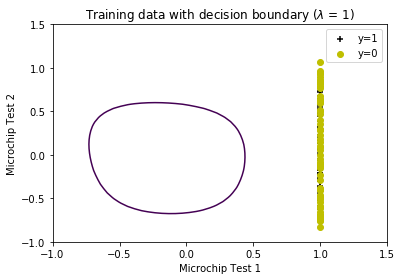

In [21]:
# Plot Boundary
plotDecisionBoundary(theta,X,y)
plt.show()

### 2.5. Try out different regularization parameters
In this part of the exercise, you will get to try different regularization parameters for the dataset to understand how regularization prevents overfitting.

Notice the changes in the decision boundary as you vary $\lambda$. With a small $\lambda$, you should find that the classifier gets almost every training example correct, but draws a very complicated boundary, thus overfitting the data. This is not a good decision boundary: for example, it predicts that a point at $x = (-0.25, 1.5)$ is accepted ($y = 1$), which seems to be an incorrect decision given the training set.

With a larger $\lambda$, you should see a plot that shows an simpler decision boundary which still separates the positive and negative fairly well. However, if $\lambda$ is set too high a value, you will not get a good fit and the decision boundary will not follow the data so well, thus underfitting the data.

In [19]:
def model(X,y,lambd,initial_theta):
    # Optimizing using minimize
    optimizeResult=minimize(fun=costFunctionReg, x0=initial_theta.ravel(), \
                              args=(X, y, lambd), \
                              method='BFGS', jac=True, \
                              options={'maxiter':400})
    theta = optimizeResult.x
    theta = theta.reshape((theta.shape[0], 1))
    
    return theta

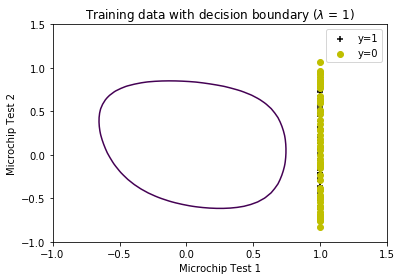

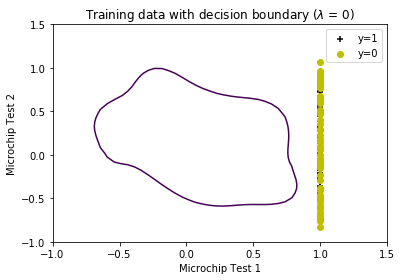

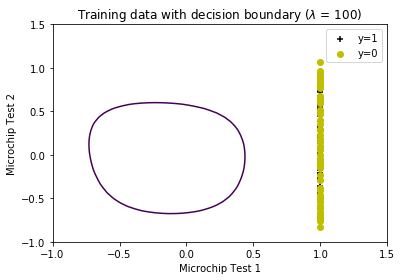

In [20]:
# Initialize fitting parameters
initial_theta = np.zeros((X.shape[1], 1))
# Set regularization parameter lambd to 1
lambdArray = [1, 0, 100]

for lambd in lambdArray:
    theta = model(X, y, lambd, initial_theta)
    plotDecisionBoundary(theta, X, y, lambd)
    plt.show()